### run tflite model

In [35]:
import numpy as np
import tflite_runtime.interpreter as tflite

In [36]:
interpreter = tflite.Interpreter(model_path='./iris_landmark.tflite')
interpreter.allocate_tensors()

In [37]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [38]:
# Test model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

In [39]:
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data  = interpreter.get_tensor(output_details[0]['index'])
output_score  = interpreter.get_tensor(output_details[1]['index'])
print(output_data, output_score)

[[ 2.05659695e+01  3.45576057e+01  2.47770643e+00  2.23624191e+01
   3.55053749e+01  1.65608716e+00  2.41763649e+01  3.60441551e+01
   7.41016865e-01  2.65510387e+01  3.66399307e+01 -2.66304286e-03
   2.97877560e+01  3.70660744e+01 -6.58978045e-01  3.25947075e+01
   3.71597748e+01 -5.75318992e-01  3.50996780e+01  3.67717209e+01
  -4.71835723e-03  3.66979942e+01  3.64185753e+01  8.60605776e-01
   3.73603096e+01  3.59147835e+01  1.06217480e+00  2.18495712e+01
   3.37007790e+01  1.51609731e+00  2.32693634e+01  3.27584381e+01
   6.41554594e-01  2.56040268e+01  3.16224060e+01  1.05538376e-01
   2.89954605e+01  3.11756401e+01 -2.77333379e-01  3.20531769e+01
   3.18565826e+01 -2.56452948e-01  3.48761024e+01  3.33341942e+01
   1.94319069e-01  3.66880226e+01  3.50539932e+01  7.09059000e-01
   1.91508560e+01  3.49044495e+01  2.69749737e+00  2.05386696e+01
   3.72000885e+01  1.54591370e+00  2.28241100e+01  3.85675659e+01
   3.79114479e-01  2.62192650e+01  3.93914642e+01 -7.44869769e-01
   2.97431

In [40]:
%%timeit
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

26.9 ms ± 466 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [41]:
import torch

In [42]:
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("cuDNN version:", torch.backends.cudnn.version())

PyTorch version: 1.6.0
CUDA version: 10.2
cuDNN version: 7605


In [43]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
from iris import iris

net = iris().to(device)
net.load_weights("iris.pth")

In [44]:
input_t = torch.from_numpy(input_data).permute((0, 3, 1, 2)).to(device)

In [45]:
with torch.no_grad():
    out = net(input_t)

In [46]:
print(output_data, output_score)
print(input_data.shape)

[[ 2.05659695e+01  3.45576057e+01  2.47770643e+00  2.23624191e+01
   3.55053749e+01  1.65608716e+00  2.41763649e+01  3.60441551e+01
   7.41016865e-01  2.65510387e+01  3.66399307e+01 -2.66304286e-03
   2.97877560e+01  3.70660744e+01 -6.58978045e-01  3.25947075e+01
   3.71597748e+01 -5.75318992e-01  3.50996780e+01  3.67717209e+01
  -4.71835723e-03  3.66979942e+01  3.64185753e+01  8.60605776e-01
   3.73603096e+01  3.59147835e+01  1.06217480e+00  2.18495712e+01
   3.37007790e+01  1.51609731e+00  2.32693634e+01  3.27584381e+01
   6.41554594e-01  2.56040268e+01  3.16224060e+01  1.05538376e-01
   2.89954605e+01  3.11756401e+01 -2.77333379e-01  3.20531769e+01
   3.18565826e+01 -2.56452948e-01  3.48761024e+01  3.33341942e+01
   1.94319069e-01  3.66880226e+01  3.50539932e+01  7.09059000e-01
   1.91508560e+01  3.49044495e+01  2.69749737e+00  2.05386696e+01
   3.72000885e+01  1.54591370e+00  2.28241100e+01  3.85675659e+01
   3.79114479e-01  2.62192650e+01  3.93914642e+01 -7.44869769e-01
   2.97431

In [47]:
out

[tensor([[ 2.0566e+01,  3.4558e+01,  2.4777e+00,  2.2362e+01,  3.5505e+01,
           1.6561e+00,  2.4176e+01,  3.6044e+01,  7.4102e-01,  2.6551e+01,
           3.6640e+01, -2.6603e-03,  2.9788e+01,  3.7066e+01, -6.5898e-01,
           3.2595e+01,  3.7160e+01, -5.7532e-01,  3.5100e+01,  3.6772e+01,
          -4.7228e-03,  3.6698e+01,  3.6419e+01,  8.6060e-01,  3.7360e+01,
           3.5915e+01,  1.0622e+00,  2.1850e+01,  3.3701e+01,  1.5161e+00,
           2.3269e+01,  3.2758e+01,  6.4156e-01,  2.5604e+01,  3.1622e+01,
           1.0554e-01,  2.8995e+01,  3.1176e+01, -2.7733e-01,  3.2053e+01,
           3.1857e+01, -2.5645e-01,  3.4876e+01,  3.3334e+01,  1.9432e-01,
           3.6688e+01,  3.5054e+01,  7.0905e-01,  1.9151e+01,  3.4904e+01,
           2.6975e+00,  2.0539e+01,  3.7200e+01,  1.5459e+00,  2.2824e+01,
           3.8568e+01,  3.7912e-01,  2.6219e+01,  3.9391e+01, -7.4487e-01,
           2.9743e+01,  3.9414e+01, -1.2921e+00,  3.2985e+01,  3.9175e+01,
          -1.3870e+00,  3

In [59]:
import cv2
img = cv2.imread("./pics/eyesample1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_ori = cv2.resize(img, (64,64))

In [60]:
img_ori = img_ori[np.newaxis, ...]
input_data = img_ori.astype('float32')
input_data = input_data / 127.5 - 1.0
input_data.shape

(1, 64, 64, 3)

In [61]:
input_data.min()

-0.8980392

In [62]:
interpreter = tflite.Interpreter(model_path='./iris_landmark.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
output_score = interpreter.get_tensor(output_details[1]['index'])
print(output_data, output_score)

[[ 20.188238    39.32341      2.9131548   22.784756    41.498703
    1.6876075   25.675268    42.782288     0.7605604   29.524086
   43.581192    -0.20995063  34.508377    43.64284     -0.5833891
   38.88111     43.08747      0.11394501  42.713333    42.29615
    1.5304599   45.20604     41.928288     2.8986976   46.348324
   41.52774      3.1595016   21.637617    37.87338      0.880095
   23.4786      36.21841     -0.65599585  26.72887     34.38756
   -1.9349568   31.707638    33.467472    -2.4141622   36.543476
   34.00237     -1.7037416   41.21544     36.35319     -0.11555918
   44.689182    39.533966     1.7801479   18.039017    39.099873
    3.5978525   20.936457    43.05573      2.327837    24.41163
   45.48823      0.9047511   29.666325    46.51555     -0.35795635
   34.89699     46.605473    -0.77110213  40.09846     45.99212
   -0.11042859  44.173615    44.711693     1.6202744   46.77768
   43.398006     2.5437126   48.43826     41.47939      3.2385066
   18.04616     34.32847

In [63]:
input_t = torch.from_numpy(input_data).permute((0, 3, 1, 2)).to(device)
with torch.no_grad():
    out = net(input_t)

In [64]:
print(out)

[tensor([[ 20.1882,  39.3234,   2.9132,  22.7848,  41.4987,   1.6876,  25.6753,
          42.7823,   0.7606,  29.5241,  43.5812,  -0.2100,  34.5084,  43.6429,
          -0.5834,  38.8811,  43.0875,   0.1139,  42.7133,  42.2962,   1.5305,
          45.2061,  41.9283,   2.8987,  46.3483,  41.5277,   3.1595,  21.6376,
          37.8734,   0.8801,  23.4786,  36.2184,  -0.6560,  26.7289,  34.3875,
          -1.9350,  31.7076,  33.4675,  -2.4142,  36.5434,  34.0024,  -1.7037,
          41.2154,  36.3532,  -0.1156,  44.6892,  39.5340,   1.7801,  18.0390,
          39.0999,   3.5979,  20.9365,  43.0557,   2.3278,  24.4116,  45.4883,
           0.9048,  29.6663,  46.5155,  -0.3580,  34.8970,  46.6055,  -0.7711,
          40.0985,  45.9921,  -0.1104,  44.1736,  44.7117,   1.6203,  46.7777,
          43.3980,   2.5437,  48.4383,  41.4794,   3.2385,  18.0462,  34.3285,
           0.4385,  20.6969,  30.8950,  -2.1649,  24.8709,  28.2723,  -3.7697,
          31.1058,  27.2821,  -4.5771,  37.4710,  2

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

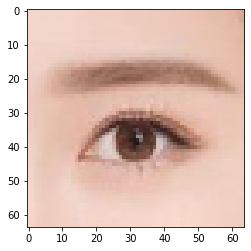

In [66]:
plt.imshow(img_ori.squeeze())

In [67]:
hand_kpts = output_data.reshape(-1, 3)
iris = output_score.reshape(-1,3)

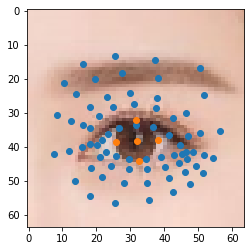

In [68]:
fig, ax = plt.subplots()
ax.imshow(img_ori.squeeze())
ax.scatter(hand_kpts[:, 0], hand_kpts[:, 1])
ax.scatter(iris[:, 0], iris[:, 1])

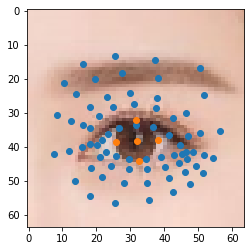

In [69]:
detections1, detections2 = out
detections1 = detections1.reshape(-1,3)
detections2 = detections2.reshape(-1,3)
fig, ax = plt.subplots()
ax.imshow(img_ori.squeeze())
ax.scatter(detections1[:, 0], detections1[:, 1])
ax.scatter(detections2[:, 0], detections2[:, 1])